# 0 - VERİ SETİ HAZIRLANMASI


In [876]:
# Veri işlemesi ve analizi kütüphaneleri
import pandas as pd
import numpy as np
# Veri görselleştirme kütüphanleri
import matplotlib.pyplot as plt
import seaborn as sns

In [877]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\notebook.xlsx"

# Excel dosyasını oku ve DataFrame'e aktar
df_ = pd.read_excel(dosya_yolu)

# Kopyalama yaptık
df = df_.copy()

# 1 - VERİYE İLK BAKIŞ

In [878]:
# DataFrame'i görüntüle
df.head(n=4)
# default olarak verseydik 5 tane sonuç döndürür. -> df.head()
# eğer sondan kayıtları listelemek isteseydik -> df.tail()

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55W,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105W,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü


In [879]:
df.shape # (satır x sütun)

(1200, 35)

In [880]:
print(df.ndim) # Verinin kaç boyutlu olduğunu gösterir.

2


In [881]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Arttırılabilir Azami Bellek', 'Bağlantılar', 'Cihaz Ağırlığı', 'Dokunmatik Ekran', 'Ekran Boyutu', 'Ekran Kartı', 'Ekran Kartı Bellek Tipi', 'Ekran Kartı Gücü', 'Ekran Kartı Hafızası', 'Ekran Kartı Tipi', 'Ekran Yenileme Hızı', 'Garanti Süresi', 'Garanti Tipi', 'Hard Disk Kapasitesi', 'Kapasite', 'Klavye', 'Kullanım Amacı', 'Maksimum İşlemci Hızı (GHz)', 'Menşei', 'Panel Tipi', 'Price', 'Ram (Sistem Belleği)', 'Ram (Sistem Belleği) Tipi', 'Renk', 'SSD Kapasitesi', 'Temel İşlemci Hızı (GHz)', 'Title', 'Çözünürlük', 'Çözünürlük Standartı', 'İşlemci Modeli', 'İşlemci Nesli', 'İşlemci Tipi', 'İşlemci Çekirdek Sayısı', 'İşletim Sistemi', 'Şarjlı Kullanım Süresi'] 

Veri seti içerisinde toplam 35 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [882]:
# Veri hakkında bilgi verir.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Arttırılabilir Azami Bellek  810 non-null    object 
 1   Bağlantılar                  1197 non-null   object 
 2   Cihaz Ağırlığı               1200 non-null   object 
 3   Dokunmatik Ekran             1200 non-null   object 
 4   Ekran Boyutu                 1200 non-null   object 
 5   Ekran Kartı                  1200 non-null   object 
 6   Ekran Kartı Bellek Tipi      1200 non-null   object 
 7   Ekran Kartı Gücü             260 non-null    object 
 8   Ekran Kartı Hafızası         1200 non-null   object 
 9   Ekran Kartı Tipi             1200 non-null   object 
 10  Ekran Yenileme Hızı          1200 non-null   object 
 11  Garanti Süresi               1200 non-null   object 
 12  Garanti Tipi                 1200 non-null   object 
 13  Hard Disk Kapasite

In [883]:
# Sütunların hangi tipte olduğunu söyler.
df.dtypes

Arttırılabilir Azami Bellek     object
Bağlantılar                     object
Cihaz Ağırlığı                  object
Dokunmatik Ekran                object
Ekran Boyutu                    object
Ekran Kartı                     object
Ekran Kartı Bellek Tipi         object
Ekran Kartı Gücü                object
Ekran Kartı Hafızası            object
Ekran Kartı Tipi                object
Ekran Yenileme Hızı             object
Garanti Süresi                  object
Garanti Tipi                    object
Hard Disk Kapasitesi            object
Kapasite                        object
Klavye                          object
Kullanım Amacı                  object
Maksimum İşlemci Hızı (GHz)    float64
Menşei                          object
Panel Tipi                      object
Price                           object
Ram (Sistem Belleği)            object
Ram (Sistem Belleği) Tipi       object
Renk                            object
SSD Kapasitesi                  object
Temel İşlemci Hızı (GHz) 

In [884]:
# SSD kapasitesini GB cinsine çevirecek bir fonksiyon
def convert_tb_to_gb(ssd_capacity):
    if 'TB' in ssd_capacity:
        # Eğer TB varsa, GB'ye çevir
        return str(int(ssd_capacity.split()[0]) * 1024) + " GB"  # 1 TB = 1024 GB
    else:
        # GB ise olduğu gibi bırak
        return ssd_capacity

# Sadece TB olanları dönüştürüp yeni bir sütun ekliyoruz
df["SSD Kapasitesi"] = df["SSD Kapasitesi"].apply(convert_tb_to_gb)

In [885]:
df["SSD Kapasitesi"].head(n=20)

0      512 GB
1      512 GB
2      500 GB
3      512 GB
4      500 GB
5     1024 GB
6     1024 GB
7     1024 GB
8     2048 GB
9      512 GB
10     512 GB
11     512 GB
12     512 GB
13    1024 GB
14     512 GB
15     512 GB
16     512 GB
17    1024 GB
18     512 GB
19     512 GB
Name: SSD Kapasitesi, dtype: object

In [886]:
import pandas as pd

# Sayısal sütunlar
sayisal_sutunlar = [
     'Ekran Kartı Gücü',"Ekran Yenileme Hızı", 'Hard Disk Kapasitesi', 'Maksimum İşlemci Hızı (GHz)', 
    'Ram (Sistem Belleği)', 'SSD Kapasitesi', 'İşlemci Çekirdek Sayısı', 'Price'
]

# Virgül haricindeki karakterleri temizleyelim
for col in sayisal_sutunlar:
    if col in df.columns:
        # Sayısal olmayan tüm karakterleri (virgül hariç) temizlemek için regex kullanacağız
        df[col] = df[col].replace(r'[^0-9.,]', '', regex=True)  # Virgül dışındaki her şeyi temizle
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Sayısal türüne dönüştür, hata olanları NaN yapar

# Veriyi yeni bir Excel dosyasına kaydedelim
df.to_excel('cleaned_data.xlsx', index=False)

print("Veri başarıyla 'cleaned_data.xlsx' dosyasına kaydedildi.")

Veri başarıyla 'cleaned_data.xlsx' dosyasına kaydedildi.


In [887]:
# Temizlenmiş Excel dosyasını yükleyelim
df = pd.read_excel('cleaned_data.xlsx')

In [888]:
df.dtypes

Arttırılabilir Azami Bellek     object
Bağlantılar                     object
Cihaz Ağırlığı                  object
Dokunmatik Ekran                object
Ekran Boyutu                    object
Ekran Kartı                     object
Ekran Kartı Bellek Tipi         object
Ekran Kartı Gücü               float64
Ekran Kartı Hafızası            object
Ekran Kartı Tipi                object
Ekran Yenileme Hızı            float64
Garanti Süresi                  object
Garanti Tipi                    object
Hard Disk Kapasitesi           float64
Kapasite                        object
Klavye                          object
Kullanım Amacı                  object
Maksimum İşlemci Hızı (GHz)    float64
Menşei                          object
Panel Tipi                      object
Price                          float64
Ram (Sistem Belleği)             int64
Ram (Sistem Belleği) Tipi       object
Renk                            object
SSD Kapasitesi                 float64
Temel İşlemci Hızı (GHz) 

In [889]:
df.head()

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü
4,64 GB,HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,...,2.5,Excalibur G770.1245-BVJ0X-B i5-12450H 16GB RAM...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,NaN


In [890]:
df['Ekran Kartı'][:3]

0    Nvidia GeForce RTX 4060
1    Nvidia GeForce RTX 3050
2    Nvidia GeForce RTX 2050
Name: Ekran Kartı, dtype: object

Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [891]:
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

,count,mean,std,min,25%,50%,75%,max
Ekran Kartı Gücü,260.0,106.673077,35.070101,45.000,95.000,105.000,140.000,175.000
Ekran Yenileme Hızı,1156.0,160.863322,38.729838,60.000,144.000,144.000,165.000,360.000
Hard Disk Kapasitesi,41.0,244.463415,252.476246,1.000,1.000,2.000,500.000,500.000
Maksimum İşlemci Hızı (GHz),742.0,4.739218,0.264521,4.200,4.500,4.700,5.000,5.000
Price,786.0,48.739373,28.523317,15.049,32.224,41.599,49.999,238.399
Ram (Sistem Belleği),1200.0,30.793333,22.997928,8.000,16.000,24.000,32.000,128.000
SSD Kapasitesi,1195.0,1063.986611,940.029965,256.000,512.000,1024.000,1024.000,8192.000
İşlemci Çekirdek Sayısı,1199.0,12.558799,6.013869,1.000,8.000,12.000,16.000,24.000


In [892]:
df["SSD Kapasitesi"].mode()[0]

1024.0

# 2- EKSİK VERİ ANALİZİ

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

1. isna() metodu:
Pandas'taki DataFrame veya Series içinde eksik (NaN) değerleri kontrol etmek için kullanılır.
Eğer bir hücrede eksik veri (NaN) varsa, bu hücre için True döner, yoksa False döner.
Boşu true dönderir.

2. isnull() metodu:
isna() metodu ile aynı işlevi görür. Yani, eksik (NaN) değerleri kontrol eder ve her bir hücre için True veya False döner.
Pandas'ta isna() ve isnull() birbirinin yerine kullanılabilir. Aralarındaki fark sadece metod adıdır. Yani, biri diğerine eşdeğerdir.

In [893]:
def save_to_excel(df, file_name="cleaned_data.xlsx"):
    """
    Bu fonksiyon, verilen DataFrame'i belirtilen dosya adına kaydeder.

    Args:
    - df: Pandas DataFrame
    - file_name: Kaydedilecek Excel dosyasının adı
    """
    df.to_excel(file_name, index=False)
    print(f"Dosya '{file_name}' adıyla başarıyla kaydedildi.")

In [894]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

Arttırılabilir Azami Bellek     390
Bağlantılar                       3
Cihaz Ağırlığı                    0
Dokunmatik Ekran                  0
Ekran Boyutu                      0
Ekran Kartı                       0
Ekran Kartı Bellek Tipi           0
Ekran Kartı Gücü                940
Ekran Kartı Hafızası              0
Ekran Kartı Tipi                  0
Ekran Yenileme Hızı              44
Garanti Süresi                    0
Garanti Tipi                      0
Hard Disk Kapasitesi           1159
Kapasite                       1199
Klavye                            0
Kullanım Amacı                    0
Maksimum İşlemci Hızı (GHz)     458
Menşei                         1190
Panel Tipi                        1
Price                           414
Ram (Sistem Belleği)              0
Ram (Sistem Belleği) Tipi         0
Renk                              0
SSD Kapasitesi                    5
Temel İşlemci Hızı (GHz)        767
Title                             0
Çözünürlük                  

In [895]:
# Eksik değerlerin sayısını ve oranını hesaplama
missing_data = df.isnull().sum()  # Eksik değerlerin sayısını alıyoruz
missing_percentage = (missing_data / len(df)) * 100  # Oranı hesaplıyoruz

In [896]:
missing_percentage

Arttırılabilir Azami Bellek    32.500000
Bağlantılar                     0.250000
Cihaz Ağırlığı                  0.000000
Dokunmatik Ekran                0.000000
Ekran Boyutu                    0.000000
Ekran Kartı                     0.000000
Ekran Kartı Bellek Tipi         0.000000
Ekran Kartı Gücü               78.333333
Ekran Kartı Hafızası            0.000000
Ekran Kartı Tipi                0.000000
Ekran Yenileme Hızı             3.666667
Garanti Süresi                  0.000000
Garanti Tipi                    0.000000
Hard Disk Kapasitesi           96.583333
Kapasite                       99.916667
Klavye                          0.000000
Kullanım Amacı                  0.000000
Maksimum İşlemci Hızı (GHz)    38.166667
Menşei                         99.166667
Panel Tipi                      0.083333
Price                          34.500000
Ram (Sistem Belleği)            0.000000
Ram (Sistem Belleği) Tipi       0.000000
Renk                            0.000000
SSD Kapasitesi  

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [897]:
df.isna().sum().sum() 

7456

In [898]:
# Her bir sütundaki ne kadar veri olduğunu gösterir.
df.notnull().sum()

Arttırılabilir Azami Bellek     810
Bağlantılar                    1197
Cihaz Ağırlığı                 1200
Dokunmatik Ekran               1200
Ekran Boyutu                   1200
Ekran Kartı                    1200
Ekran Kartı Bellek Tipi        1200
Ekran Kartı Gücü                260
Ekran Kartı Hafızası           1200
Ekran Kartı Tipi               1200
Ekran Yenileme Hızı            1156
Garanti Süresi                 1200
Garanti Tipi                   1200
Hard Disk Kapasitesi             41
Kapasite                          1
Klavye                         1200
Kullanım Amacı                 1200
Maksimum İşlemci Hızı (GHz)     742
Menşei                           10
Panel Tipi                     1199
Price                           786
Ram (Sistem Belleği)           1200
Ram (Sistem Belleği) Tipi      1200
Renk                           1200
SSD Kapasitesi                 1195
Temel İşlemci Hızı (GHz)        433
Title                          1200
Çözünürlük                  

None ve NaN değerler arasındaki fark nedir?

None (null) değerler ile NaN değerler arasındaki farkın ne olduğunu görmek için güzel bir kaynak: https://medium.com/@allenhuang1996/whats-the-difference-between-null-and-nan-in-python-a1af20d523ce

In [899]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 34544 adet eksik olmayan, 7456 eksik gözlem var.


In [900]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi
0,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,LOQ 15IAX9 83GS007XTR i5-12450HX 8GB 512 GB SS...,1920 x 1080,Full HD (FHD),Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
1,16 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,...,NaN,G15-5530 Intel Core i7-13650HX 16GB 512GB SSD ...,1920 x 1080,Full HD (FHD),13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,NaN
2,16 GB,USB - Bluetooth - HDMI,2 kg ve altı,Yok,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,...,2.3,Abra A5 V21.3 Intel Core i7 12700H 16 GB RAM 5...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,4-6 Saat
3,32 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,...,3.1,LOQ Intel Core i5-12450HX 16GB 512GB SSD 6GB R...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,6 Saat ve Üstü
4,64 GB,HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,...,2.5,Excalibur G770.1245-BVJ0X-B i5-12450H 16GB RAM...,1920 x 1080,Full HD (FHD),12450H,12. Nesil,Intel Core i5,8.0,Free Dos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,64 GB,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"17,3 inç",Nvidia GeForce RTX 4060,GDDR6,105.0,8 GB,Harici,...,1.8,Katana 17 B13VFK37 i7 13620H 96GB 256GB SSD RT...,1920 x 1080,Full HD (FHD),13620H,13. Nesil,Intel Core i7,16.0,Windows,NaN
1196,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,16 inç,Nvidia GeForce RTX 3050 Ti,GDDR6,NaN,4 GB ve altı,Harici,...,NaN,GU603ZE-LS012 INTEL / I7-12700 / 16GB / 512GB ...,1920 x 1200,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Free Dos,NaN
1197,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,Nitro 5 i7 12700H 48GB 4TB SSD RTX4060/8GB 165...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Windows,NaN
1198,NaN,USB - Bluetooth - HDMI,2 - 4 kg,Yok,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,...,NaN,Nitro 5 i7 12700H 32GB 4TB SSD RTX4060/8GB 165...,1920 x 1080,Full HD (FHD),12700H,12. Nesil,Intel Core i7,14.0,Windows,NaN


In [901]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Arttırılabilir Azami Bellek,Bağlantılar,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,...,Temel İşlemci Hızı (GHz),Title,Çözünürlük,Çözünürlük Standartı,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Şarjlı Kullanım Süresi


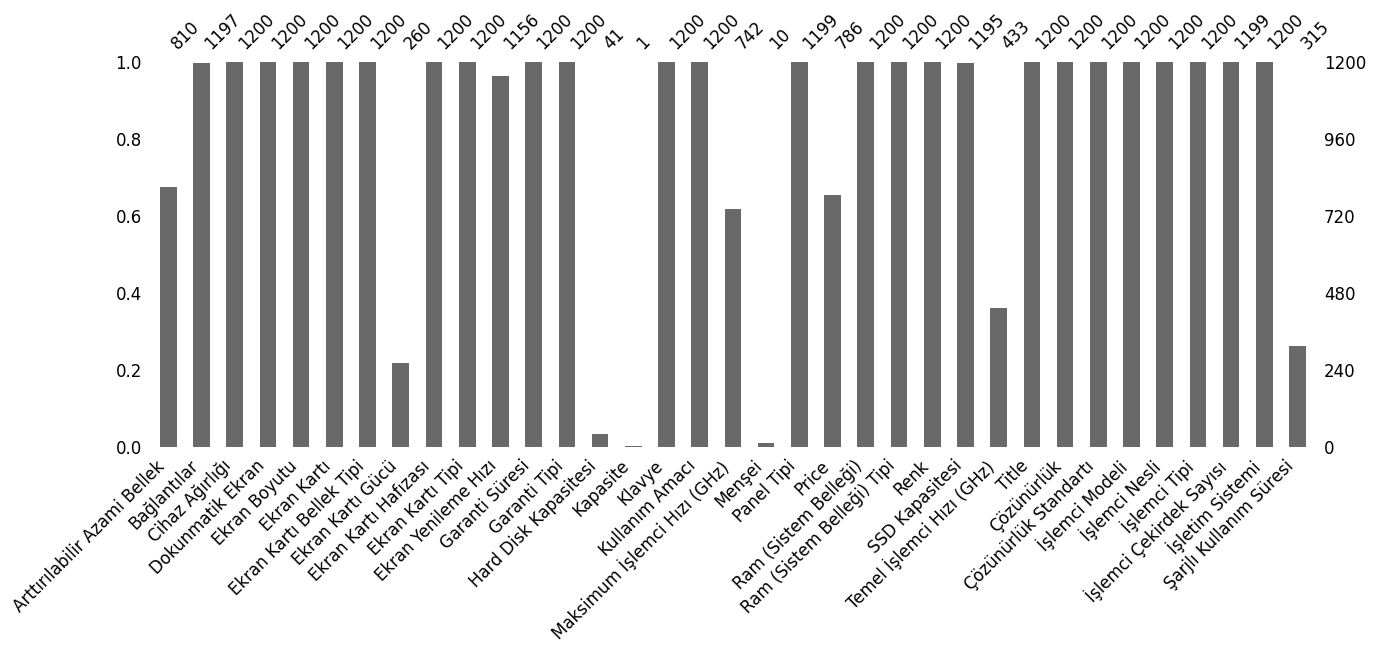

In [902]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (15, 5),
         fontsize = 12);

In [903]:
# Yukarıda görülen grafiğe bakarak kapasite ve menşei'nin bizim yapacağımız modele bir faydası olmadığından ve verileri eksik olduğundan siliyoruz.
df.drop(columns="Arttırılabilir Azami Bellek",axis=1,inplace=True)
df.drop(columns="Bağlantılar",axis=1,inplace=True)
df.drop(columns="Cihaz Ağırlığı",axis=1,inplace=True)
df.drop(columns="Dokunmatik Ekran",axis=1,inplace=True)
df.drop(columns="Garanti Süresi",axis=1,inplace=True)
df.drop(columns="Garanti Tipi",axis=1,inplace=True)
df.drop(columns="Kapasite", axis=1, inplace=True)
df.drop(columns="Klavye",axis=1,inplace=True)
df.drop(columns="Kullanım Amacı",axis=1,inplace=True)
df.drop(columns="Menşei", axis=1, inplace=True)
df.drop(columns="Temel İşlemci Hızı (GHz)", axis=1, inplace=True)
df.drop(columns="Title", axis=1, inplace=True)
df.drop(columns="Çözünürlük", axis=1, inplace=True)
df.drop(columns="Çözünürlük Standartı", axis=1, inplace=True)
df.drop(columns="Şarjlı Kullanım Süresi", axis=1, inplace=True)

# 'Price' sütununu en sona taşımak
columns = [col for col in df.columns if col != 'Price']  # 'Price' dışındaki sütunları al
columns.append('Price')  # 'Price' sütununu sona ekle

# Yeni sütun sırasına göre DataFrame'i yeniden düzenle
df = df[columns]

save_to_excel(df)

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [904]:
print(list(df.columns))

['Ekran Boyutu', 'Ekran Kartı', 'Ekran Kartı Bellek Tipi', 'Ekran Kartı Gücü', 'Ekran Kartı Hafızası', 'Ekran Kartı Tipi', 'Ekran Yenileme Hızı', 'Hard Disk Kapasitesi', 'Maksimum İşlemci Hızı (GHz)', 'Panel Tipi', 'Ram (Sistem Belleği)', 'Ram (Sistem Belleği) Tipi', 'Renk', 'SSD Kapasitesi', 'İşlemci Modeli', 'İşlemci Nesli', 'İşlemci Tipi', 'İşlemci Çekirdek Sayısı', 'İşletim Sistemi', 'Price']


In [905]:
len(df.columns)

20

In [906]:
'Kapasite' in df.columns

False

In [907]:
df.dtypes

Ekran Boyutu                    object
Ekran Kartı                     object
Ekran Kartı Bellek Tipi         object
Ekran Kartı Gücü               float64
Ekran Kartı Hafızası            object
Ekran Kartı Tipi                object
Ekran Yenileme Hızı            float64
Hard Disk Kapasitesi           float64
Maksimum İşlemci Hızı (GHz)    float64
Panel Tipi                      object
Ram (Sistem Belleği)             int64
Ram (Sistem Belleği) Tipi       object
Renk                            object
SSD Kapasitesi                 float64
İşlemci Modeli                  object
İşlemci Nesli                   object
İşlemci Tipi                    object
İşlemci Çekirdek Sayısı        float64
İşletim Sistemi                 object
Price                          float64
dtype: object

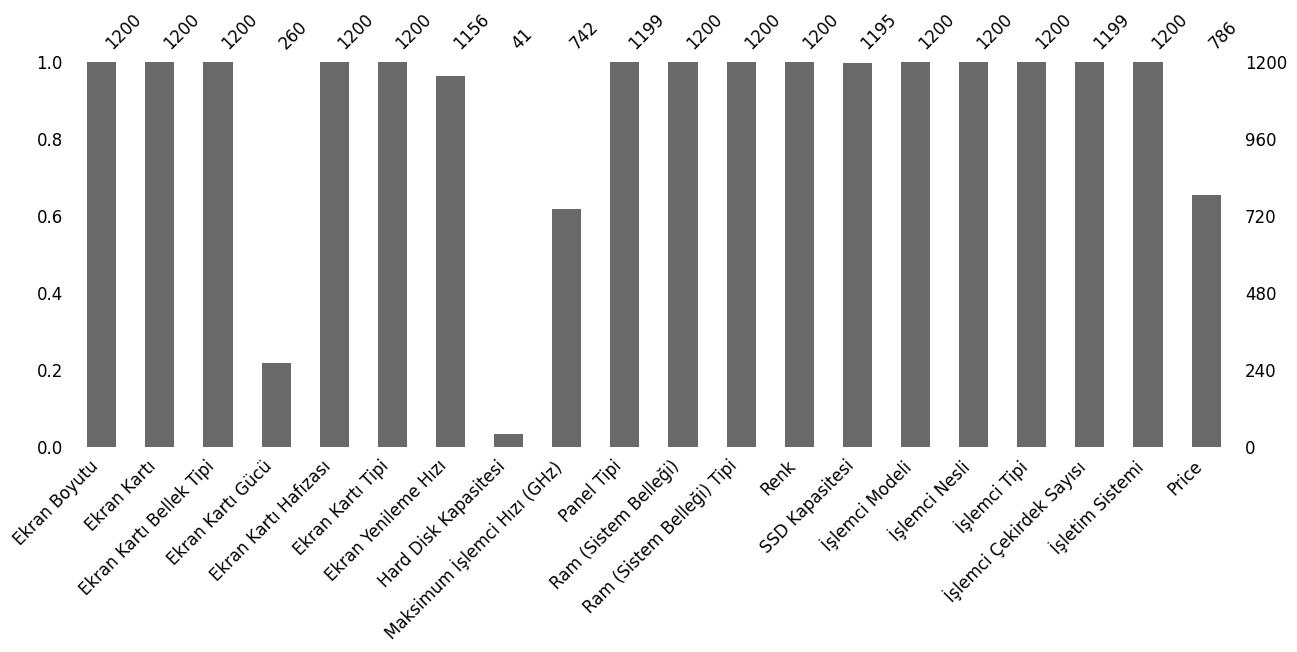

In [908]:
import missingno as msno

msno.bar(df = df,
         figsize = (15, 5),
         fontsize = 12);

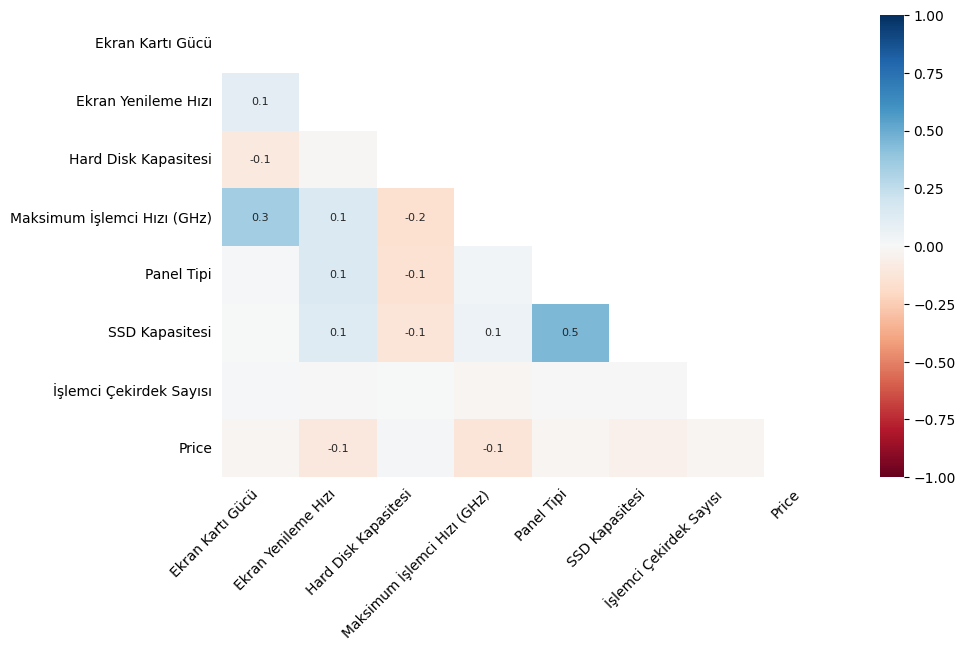

In [909]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

# 2.1 - Eksik Verilerin Silinmesi

Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.

Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [910]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:10]
#df = df.dropna()

,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,Hard Disk Kapasitesi,Maksimum İşlemci Hızı (GHz),Panel Tipi,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,Renk,SSD Kapasitesi,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Price


In [911]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,Hard Disk Kapasitesi,Maksimum İşlemci Hızı (GHz),Panel Tipi,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,Renk,SSD Kapasitesi,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Price
0,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,NaN,NaN,NaN,IPS,8,DDR5,Renkli,512.0,Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
1,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,120.0,NaN,NaN,VA,16,DDR5,Siyah,512.0,13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,34.899
2,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,144.0,NaN,4.7,IPS,16,DDR4,Siyah,500.0,12700H,12. Nesil,Intel Core i7,14.0,Free Dos,28.089
3,"15,6 inç",Nvidia GeForce RTX 4050,GDDR6,105.0,6 GB,Harici,144.0,NaN,4.4,Full HD,16,DDR5,Luna Gri,512.0,12450H,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
4,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,4 GB ve altı,Harici,144.0,NaN,4.4,IPS,16,DDR4,Siyah,500.0,12450H,12. Nesil,Intel Core i5,8.0,Free Dos,26.499


# 2.2 - Eksik Verilerin Doldurulması

Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [912]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Gücü,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Yenileme Hızı,Hard Disk Kapasitesi,Maksimum İşlemci Hızı (GHz),Panel Tipi,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,Renk,SSD Kapasitesi,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi,Price
0,"15,6 inç",Nvidia GeForce RTX 4060,GDDR6,NaN,8 GB,Harici,NaN,NaN,NaN,IPS,8,DDR5,Renkli,512.0,Belirtilmemiş,12. Nesil,Intel Core i5,8.0,Free Dos,34.999
1,"15,6 inç",Nvidia GeForce RTX 3050,GDDR6,NaN,6 GB,Harici,120.0,NaN,NaN,VA,16,DDR5,Siyah,512.0,13650HX,13. Nesil,Intel Core i7,24.0,Free Dos,34.899
2,"15,6 inç",Nvidia GeForce RTX 2050,GDDR6,55.0,4 GB ve altı,Harici,144.0,NaN,4.7,IPS,16,DDR4,Siyah,500.0,12700H,12. Nesil,Intel Core i7,14.0,Free Dos,28.089


In [913]:
df_fillna.isna().sum()

Ekran Boyutu                      0
Ekran Kartı                       0
Ekran Kartı Bellek Tipi           0
Ekran Kartı Gücü                940
Ekran Kartı Hafızası              0
Ekran Kartı Tipi                  0
Ekran Yenileme Hızı              44
Hard Disk Kapasitesi           1159
Maksimum İşlemci Hızı (GHz)     458
Panel Tipi                        1
Ram (Sistem Belleği)              0
Ram (Sistem Belleği) Tipi         0
Renk                              0
SSD Kapasitesi                    5
İşlemci Modeli                    0
İşlemci Nesli                     0
İşlemci Tipi                      0
İşlemci Çekirdek Sayısı           1
İşletim Sistemi                   0
Price                           414
dtype: int64

In [914]:
print(len(df_fillna.columns))

20


## 2.2.1 - "Ekran Boyutu" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Boyutu" sütunundaki verilerin temizlenmesi ve metin (string) formatına dönüştürülmesi için yapılmıştır:

1. **Boşlukların Temizlenmesi**: `str.strip()` fonksiyonu kullanılarak, "Ekran Boyutu" sütunundaki baştaki ve sondaki boşluklar temizlenmiştir. Bu işlem, verinin daha düzgün bir şekilde işlenebilmesi için önemlidir.

2. **'İnç' İfadesinin Kaldırılması**: `str.replace()` fonksiyonu ile "Ekran Boyutu" sütunundaki her değerin sonunda yer alan 'inç' ifadesi kaldırılmıştır. Bu, sayısal bir analiz yapabilmek için gereklidir.

3. **Metin Olarak Saklanması**: `astype(str)` fonksiyonu kullanılarak, "Ekran Boyutu" sütunundaki tüm veriler metin (string) formatına dönüştürülmüştür. Bu sayede, sayısal olmayan değerler ve kalan veriler metin olarak saklanır.

4. **Verilerin Kaydedilmesi**: İşlem tamamlandığında, veri seti `save_to_excel()` fonksiyonu ile Excel dosyasına kaydedilmiştir (eğer isteniyorsa).

Sonuç olarak, "Ekran Boyutu" sütunundaki boşluklar temizlenmiş, 'inç' ifadesi kaldırılmış ve kalan veriler metin (string) olarak saklanmıştır.



In [915]:
# Ekran Boyutu sütunundaki baştaki ve sondaki boşlukları temizleyelim
df_fillna['Ekran Boyutu'] = df_fillna['Ekran Boyutu'].str.strip()

# Ekran Boyutu sütunundaki 'inç' ifadesini sonundan kaldıralım
df_fillna['Ekran Boyutu'] = df_fillna['Ekran Boyutu'].str.replace(r'inç$', '', regex=True)

# Kalan ifadeleri metin (string) olarak saklayalım
df_fillna['Ekran Boyutu'] = df_fillna['Ekran Boyutu'].astype(str)

# Sonrasında dosyayı kaydedelim
save_to_excel(df_fillna)

# İşlemin başarıyla tamamlandığını bildirelim
print("Ekran Boyutu sütunundaki 'inç' ifadeleri kaldırıldı ve metin olarak saklandı.")

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
Ekran Boyutu sütunundaki 'inç' ifadeleri kaldırıldı ve metin olarak saklandı.


## 2.2.2 - "Maksimum İşlemci Hızı (GHz)" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Maksimum İşlemci Hızı (GHz)" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **Ortalama (Mean) Değerinin Hesaplanması**: `mean()` fonksiyonu ile "Maksimum İşlemci Hızı (GHz)" sütununun ortalama değeri hesaplanmıştır. Bu değer, eksik hücrelerde kullanılmak üzere belirlenmiştir.

2. **Eksik Değerlerin Ortalama Değerle Doldurulması**: `fillna()` fonksiyonu ile sütundaki eksik (NaN) değerler, hesaplanan ortalama değerle doldurulmuştur. Bu işlem `inplace=True` parametresi ile doğrudan DataFrame üzerinde yapılmıştır, yani yeni bir değişken oluşturulmamıştır.

Sonuç olarak, "Maksimum İşlemci Hızı (GHz)" sütunundaki eksik değerler ortalama değerle doldurulmuş ve veri seti eksiksiz hale getirilmiştir.


In [916]:
# Maksimum İşlemci Hızı (GHz) sütununun ortalama (mean) değerini hesaplayalım
mean_islemci = df_fillna['Maksimum İşlemci Hızı (GHz)'].mean()

# Virgülden sonra yalnızca 1 basamağa yuvarlayalım
mean_islemci = round(mean_islemci, 1)

print(mean_islemci)

# Maksimum İşlemci Hızı (GHz) sütunundaki eksik değerleri ortalama değer ile dolduralım
df_fillna['Maksimum İşlemci Hızı (GHz)'].fillna(value=mean_islemci, inplace=True)

# Maksimum İşlemci Hızı (GHz)'nın 742 tane kaydı vardı. kaydı olanların ortalamasını alarak boş olan satırlara ekledik.

4.7


C:\Users\yusuf\AppData\Local\Temp\ipykernel_7104\3848615271.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Maksimum İşlemci Hızı (GHz)'].fillna(value=mean_islemci, inplace=True)


In [917]:
df_fillna['Maksimum İşlemci Hızı (GHz)']

0       4.7
1       4.7
2       4.7
3       4.4
4       4.4
       ... 
1195    4.9
1196    4.7
1197    4.7
1198    4.7
1199    4.7
Name: Maksimum İşlemci Hızı (GHz), Length: 1200, dtype: float64

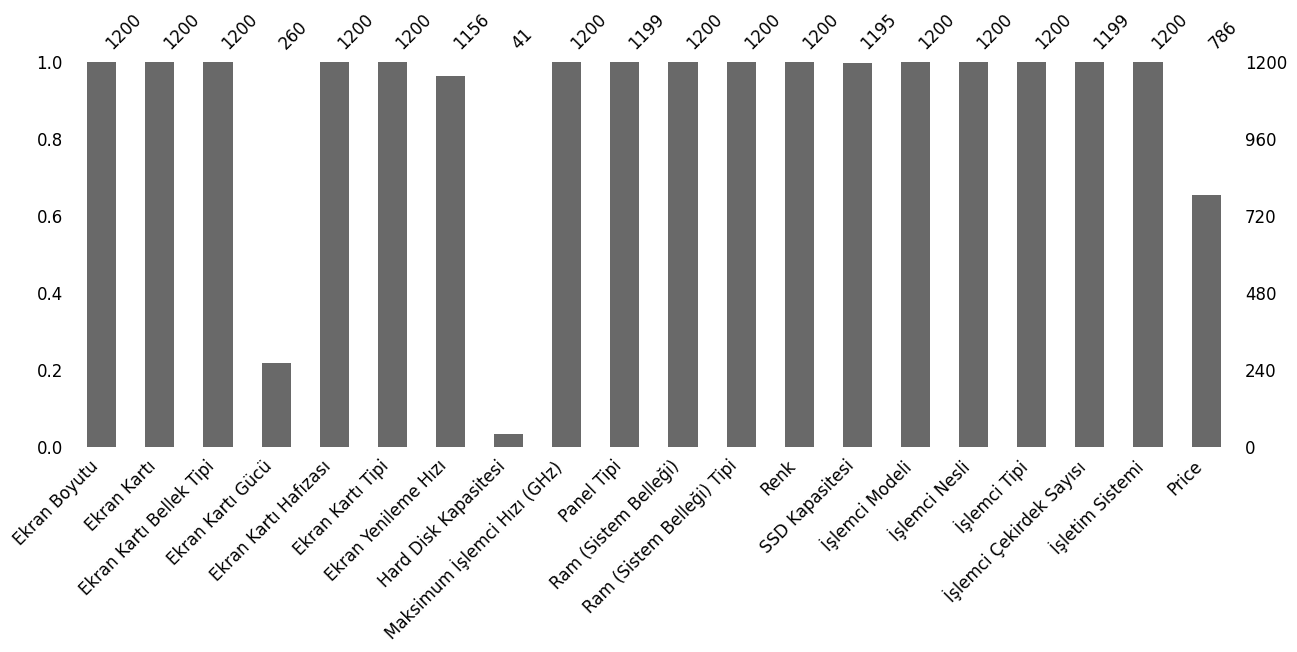

In [918]:
import missingno as msno

msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

In [919]:
df_fillna.describe().T

,count,mean,std,min,25%,50%,75%,max
Ekran Kartı Gücü,260.0,106.673077,35.070101,45.000,95.000,105.000,140.000,175.000
Ekran Yenileme Hızı,1156.0,160.863322,38.729838,60.000,144.000,144.000,165.000,360.000
Hard Disk Kapasitesi,41.0,244.463415,252.476246,1.000,1.000,2.000,500.000,500.000
Maksimum İşlemci Hızı (GHz),1200.0,4.724250,0.208822,4.200,4.700,4.700,4.900,5.000
Ram (Sistem Belleği),1200.0,30.793333,22.997928,8.000,16.000,24.000,32.000,128.000
SSD Kapasitesi,1195.0,1063.986611,940.029965,256.000,512.000,1024.000,1024.000,8192.000
İşlemci Çekirdek Sayısı,1199.0,12.558799,6.013869,1.000,8.000,12.000,16.000,24.000
Price,786.0,48.739373,28.523317,15.049,32.224,41.599,49.999,238.399


## 2.2.3 - "Ekran Kartı Hafızası" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Kartı Hafızası" sütunundaki verileri temizlemek ve uygun hale getirmek için yapılmıştır:

1. **Baş ve Son Boşluklar Temizlendi**: `str.strip()` ile sütundaki tüm değerlerin başındaki ve sonundaki boşluklar kaldırıldı.

2. **"ve altı" İfadesi Silindi**: `str.replace(' ve altı', '')` ile tüm değerlerden `"ve altı"` ifadesi kaldırıldı.

3. **"Paylaşımlı" İfadesi Silindi**: `replace('Paylaşımlı', '')` ile `"Paylaşımlı"` ifadesi boş string ile değiştirildi.

4. **"GB" İfadesi Sonundan Kaldırıldı**: `str.replace(r'GB$', '')` ile tüm değerlerin sonundaki `"GB"` ifadesi silindi.

5. **Sayısal Değere Dönüştürüldü**: `pd.to_numeric()` ile sütun sayısal verilere dönüştürüldü ve geçersiz değerler `NaN` olarak işaretlendi.

Sonuç olarak, bu işlemler sayesinde sütun sadece sayısal değerleri içerecek şekilde temizlendi ve analiz için hazır hale getirildi.


In [920]:
# 'Ekran Kartı Hafızası' sütunundaki baştaki ve sondaki boşlukları temizleyip 've altı' ifadesini silme
df_fillna['Ekran Kartı Hafızası'] = df_fillna['Ekran Kartı Hafızası'].str.strip().str.replace(' ve altı', '', regex=False)
# Yorum: str.strip() baştaki ve sondaki boşlukları temizler.
# str.replace(' ve altı', '') 've altı' ifadesini siler.

# 'Ekran Kartı Hafızası' sütununda 'Paylaşımlı' ifadesini boş string ile değiştirme
df_fillna["Ekran Kartı Hafızası"] = df_fillna["Ekran Kartı Hafızası"].replace('Paylaşımlı', '')
# Yorum: 'Paylaşımlı' ifadesini boşlukla değiştirir. Bu, ekran kartı hafızasında paylaşımlı yazan hücrelerde boşluk bırakır.

# 'Ekran Kartı Hafızası' sütunundaki 'GB' ifadesini silme
df_fillna['Ekran Kartı Hafızası'] = df_fillna['Ekran Kartı Hafızası'].str.replace(r'GB$', '', regex=True)
# Yorum: 'GB' ifadesinin metnin sonunda olması durumunda (GB$ regex ile) siler. Bu, GB'nin yalnızca son kısmını kaldırır.

# 'Ekran Kartı Hafızası' sütununu sayısal (numeric) değere dönüştürme
df_fillna['Ekran Kartı Hafızası'] = pd.to_numeric(df_fillna['Ekran Kartı Hafızası'], errors='coerce')
# Yorum: 'Ekran Kartı Hafızası' sütunundaki değerleri sayısal (numeric) veri türüne dönüştürür. 
# Eğer dönüşüm mümkün değilse, o hücreyi 'NaN' yapar (errors='coerce').

# Sonrasında dosyayı tekrar kaydedin
save_to_excel(df_fillna)
# Yorum: Verilen DataFrame'i (df_fillna) yeni haliyle Excel dosyasına kaydeder. (save_to_excel fonksiyonu dışarıdan tanımlanmış olmalı).


Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [921]:
df_fillna["Ekran Kartı Hafızası"].head()

0    8.0
1    6.0
2    4.0
3    6.0
4    4.0
Name: Ekran Kartı Hafızası, dtype: float64

In [922]:
# 'Ekran Kartı Hafızası' sütunundaki farklı değerleri görmek için
print(df_fillna['Ekran Kartı Hafızası'].unique())

[ 8.  6.  4. nan 16. 12.]


In [923]:
# 'Ekran Kartı Hafızası' sütunundaki NaN değerlerinin sayısını görmek
nan_count_column = df_fillna['Ekran Kartı Hafızası'].isna().sum()
print(f"'Ekran Kartı Hafızası' sütunundaki NaN sayısı: {nan_count_column}")

'Ekran Kartı Hafızası' sütunundaki NaN sayısı: 49


In [924]:

# 'Ekran Kartı Hafızası' sütunundaki en çok tekrar eden değeri bulma
most_frequent_value = df_fillna['Ekran Kartı Hafızası'].mode()[0]

# 'Ekran Kartı Hafızası' sütunundaki boş değerleri ("" veya " ") NaN ile değiştirme
df_fillna['Ekran Kartı Hafızası'] = df_fillna['Ekran Kartı Hafızası'].replace(['', ' '], pd.NA)

# NaN hücrelerini en çok tekrar eden değerle doldurma
df_fillna['Ekran Kartı Hafızası'] = df_fillna['Ekran Kartı Hafızası'].fillna(most_frequent_value)

# Kaydetme fonksiyonu
save_to_excel(df_fillna)

# Sonuçları kontrol etme
print(f"En çok tekrar eden değer: {most_frequent_value}")



Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
En çok tekrar eden değer: 8.0


In [925]:
df_fillna["Ekran Kartı Hafızası"].unique()

array([ 8.,  6.,  4., 16., 12.])

## 2.2.4 - "Ekran Kartı Gücü" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Kartı Gücü" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **En Sık (Mode) Değeri Hesaplama**: `mean()` fonksiyonu yerine `mode()` kullanarak "Ekran Kartı Gücü" sütunundaki en sık tekrar eden değeri bulmak daha doğru olacaktır. Ancak burada `mean()` yerine `mode()` kullanmamışız ve yanlış bir işlem yapılmış. Bunu düzeltmek için, `mode()` fonksiyonu kullanılmalı.

2. **Eksik (NaN) Değerleri Mode ile Doldurma**: `fillna()` fonksiyonu ile sütundaki eksik (NaN) değerler, en sık tekrar eden değerle doldurulmuştur.

3. **Eksik Değerlerin Durumunu Kontrol Etme**: `isna().sum()` fonksiyonu kullanılarak sütundaki eksik (NaN) değerlerin sayısı kontrol edilmiştir.

4. **Veriyi Kaydetme**: Temizlenen veriler, `save_to_excel()` fonksiyonu ile Excel dosyasına kaydedilmiştir.

Bu işlemler sonucunda, "Ekran Kartı Gücü" sütunundaki eksik veriler en sık tekrar eden değerle doldurulmuş ve veri seti kaydedilmiştir.


In [926]:
df_fillna[['Ekran Kartı Gücü']][100:300]

,Ekran Kartı Gücü
100,NaN
101,NaN
102,NaN
103,NaN
104,NaN
...,...
295,120.0
296,105.0
297,NaN
298,NaN


In [927]:
# Ekran Kartı Gücü sütununun en sık (mode) değerini bulalım
ekran_karti_mode = int(df_fillna['Ekran Kartı Gücü'].mean())

# Ekran Kartı Gücü sütunundaki eksik değerleri mode ile dolduralım
df_fillna['Ekran Kartı Gücü'] = df_fillna['Ekran Kartı Gücü'].fillna(value=ekran_karti_mode)

# Veriyi Excel dosyasına kaydedelim
save_to_excel(df_fillna)

print("Veriler Excel'e kaydedildi.")

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
Veriler Excel'e kaydedildi.


In [928]:
df_fillna[['Ekran Kartı Gücü']][:20]

,Ekran Kartı Gücü
0,106.0
1,106.0
2,55.0
3,105.0
4,106.0
5,106.0
6,106.0
7,106.0
8,106.0
9,106.0


In [929]:
# Eksik değerlerin son durumunu kontrol edelim
print("Eksik değerler (NaN) sayısı:", df_fillna.isna().sum())

Eksik değerler (NaN) sayısı: Ekran Boyutu                      0
Ekran Kartı                       0
Ekran Kartı Bellek Tipi           0
Ekran Kartı Gücü                  0
Ekran Kartı Hafızası              0
Ekran Kartı Tipi                  0
Ekran Yenileme Hızı              44
Hard Disk Kapasitesi           1159
Maksimum İşlemci Hızı (GHz)       0
Panel Tipi                        1
Ram (Sistem Belleği)              0
Ram (Sistem Belleği) Tipi         0
Renk                              0
SSD Kapasitesi                    5
İşlemci Modeli                    0
İşlemci Nesli                     0
İşlemci Tipi                      0
İşlemci Çekirdek Sayısı           1
İşletim Sistemi                   0
Price                           414
dtype: int64


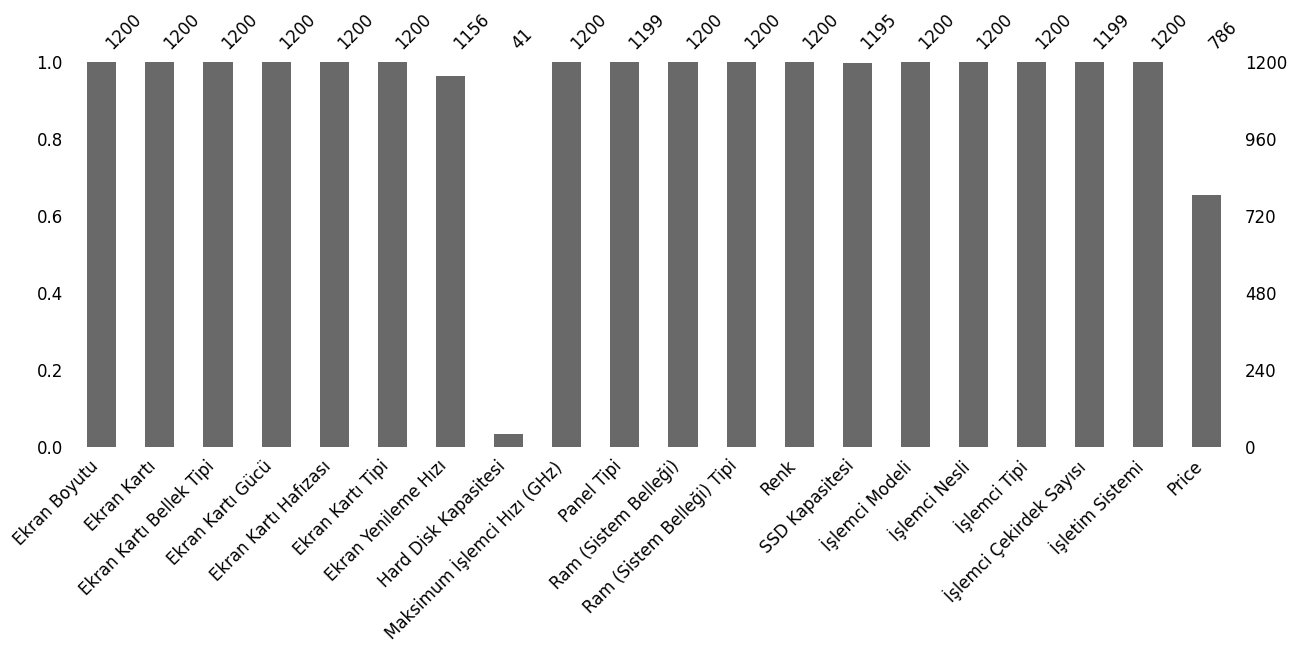

In [930]:
import missingno as msno

msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

## 2.2.5 - "Ekran Yenileme Hızı" Sütununda Yapılan İşlemler

Aşağıdaki işlemler, "Ekran Yenileme Hızı" sütunundaki eksik (NaN) değerleri doldurmak için yapılmıştır:

1. **Ekran Yenileme Hızının Ortalama (Mean) Değerinin Hesaplanması**: `mode()` fonksiyonu kullanılarak "Ekran Yenileme Hızı" sütununun en çok tekrar eden değeri hesaplanmıştır. Bu tekrar eden değer, eksik (NaN) değerleri doldurmak için kullanılacaktır.

2. **Eksik Değerlerin En Çok Tekrar Eden Değerle Doldurulması**: `fillna()` fonksiyonu ile, sütundaki eksik (NaN) değerler hesaplanan ortalama değer ile doldurulmuştur. Bu işlem `inplace=True` parametresi ile doğrudan DataFrame üzerinde gerçekleştirilmiştir, yani yeni bir değişken oluşturulmamıştır.

Sonuç olarak, "Ekran Yenileme Hızı" sütunundaki eksik değerler ortalama değeriyle doldurulmuş ve veri seti eksiksiz hale getirilmiştir.


In [931]:
# "Ekran Yenileme Hızı" sütununun ortalama (mean) değerini hesaplayalım
mode_ekran_yenileme = df_fillna['Ekran Yenileme Hızı'].mode()
print(mode_ekran_yenileme)

# Ekran Yenileme Hızı sütunundaki eksik değerleri ortalama değer ile dolduralım
df_fillna['Ekran Yenileme Hızı'].fillna(value=mode_ekran_yenileme, inplace=True)

save_to_excel(df = df_fillna)

0    144.0
Name: Ekran Yenileme Hızı, dtype: float64


C:\Users\yusuf\AppData\Local\Temp\ipykernel_7104\2440962837.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Ekran Yenileme Hızı'].fillna(value=mode_ekran_yenileme, inplace=True)


Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [932]:
# Sonuçları kontrol etmek için
print("Eksik değerler (NaN) sayısı:", df_fillna.isna().sum())

Eksik değerler (NaN) sayısı: Ekran Boyutu                      0
Ekran Kartı                       0
Ekran Kartı Bellek Tipi           0
Ekran Kartı Gücü                  0
Ekran Kartı Hafızası              0
Ekran Kartı Tipi                  0
Ekran Yenileme Hızı              43
Hard Disk Kapasitesi           1159
Maksimum İşlemci Hızı (GHz)       0
Panel Tipi                        1
Ram (Sistem Belleği)              0
Ram (Sistem Belleği) Tipi         0
Renk                              0
SSD Kapasitesi                    5
İşlemci Modeli                    0
İşlemci Nesli                     0
İşlemci Tipi                      0
İşlemci Çekirdek Sayısı           1
İşletim Sistemi                   0
Price                           414
dtype: int64


# Hard Disk Kapasitesi sil
Çok az veri olduğu için silinmiştir.

In [933]:
df_fillna.drop(columns="Hard Disk Kapasitesi", axis=1, inplace=True)
save_to_excel(df= df_fillna)

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.


In [934]:
list(df_fillna.columns)

['Ekran Boyutu',
 'Ekran Kartı',
 'Ekran Kartı Bellek Tipi',
 'Ekran Kartı Gücü',
 'Ekran Kartı Hafızası',
 'Ekran Kartı Tipi',
 'Ekran Yenileme Hızı',
 'Maksimum İşlemci Hızı (GHz)',
 'Panel Tipi',
 'Ram (Sistem Belleği)',
 'Ram (Sistem Belleği) Tipi',
 'Renk',
 'SSD Kapasitesi',
 'İşlemci Modeli',
 'İşlemci Nesli',
 'İşlemci Tipi',
 'İşlemci Çekirdek Sayısı',
 'İşletim Sistemi',
 'Price']

# İşlemci Modeli Belirtilmemişse boş bırak

In [935]:
# 'Belirtilmemiş' değerlerini boş string ("") ile değiştirme
df_fillna["İşlemci Modeli"] = df_fillna["İşlemci Modeli"].replace("Belirtilmemiş", "")

# Boş stringleri NaN ile değiştirelim ki fillna() kullanabilelim
df_fillna['İşlemci Modeli'].replace("", pd.NA, inplace=True)

# 'İşlemci Modeli' sütunundaki en sık tekrar eden değeri (mode) bulma
mode_islemci_değeri = df_fillna['İşlemci Modeli'].mode()[0]

# Mode değerini yazdıralım
print(f"En sık tekrar eden değer: {mode_islemci_değeri}")

# Eksik (NaN) değerleri en sık tekrarlanan değerle doldurma
df_fillna['İşlemci Modeli'].fillna(value=mode_islemci_değeri, inplace=True)

# Dosyayı kaydedelim
save_to_excel(df=df_fillna)

# İşlemin tamamlandığını belirten mesaj
print("İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.")


En sık tekrar eden değer: 12450H


C:\Users\yusuf\AppData\Local\Temp\ipykernel_7104\2990617831.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['İşlemci Modeli'].replace("", pd.NA, inplace=True)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_7104\2990617831.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Dosya 'cleaned_data.xlsx' adıyla başarıyla kaydedildi.
İşlemci Modeli sütunundaki eksik veriler dolduruldu ve dosya kaydedildi.


In [936]:
df_fillna["İşlemci Modeli"].head()

0     12450H
1    13650HX
2     12700H
3     12450H
4     12450H
Name: İşlemci Modeli, dtype: object

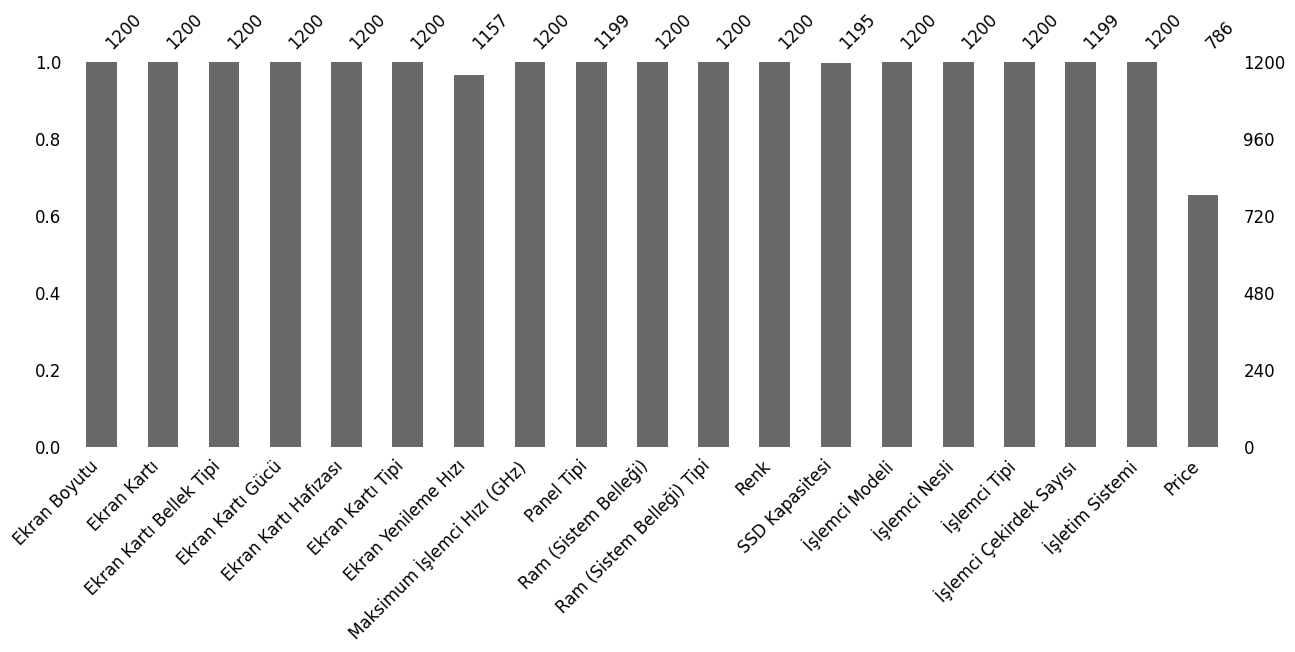

In [937]:
import missingno as msno

msno.bar(df = df_fillna,
         figsize = (15, 5),
         fontsize = 12);

In [938]:
df = df_fillna.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ekran Boyutu                 1200 non-null   object 
 1   Ekran Kartı                  1200 non-null   object 
 2   Ekran Kartı Bellek Tipi      1200 non-null   object 
 3   Ekran Kartı Gücü             1200 non-null   float64
 4   Ekran Kartı Hafızası         1200 non-null   float64
 5   Ekran Kartı Tipi             1200 non-null   object 
 6   Ekran Yenileme Hızı          1157 non-null   float64
 7   Maksimum İşlemci Hızı (GHz)  1200 non-null   float64
 8   Panel Tipi                   1199 non-null   object 
 9   Ram (Sistem Belleği)         1200 non-null   int64  
 10  Ram (Sistem Belleği) Tipi    1200 non-null   object 
 11  Renk                         1200 non-null   object 
 12  SSD Kapasitesi               1195 non-null   float64
 13  İşlemci Modeli    

In [939]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Ekran Boyutu,Ekran Kartı,Ekran Kartı Bellek Tipi,Ekran Kartı Tipi,Panel Tipi,Ram (Sistem Belleği) Tipi,Renk,İşlemci Modeli,İşlemci Nesli,İşlemci Tipi,İşletim Sistemi
0,"15,6",Nvidia GeForce RTX 4060,GDDR6,Harici,IPS,DDR5,Renkli,12450H,12. Nesil,Intel Core i5,Free Dos
1,"15,6",Nvidia GeForce RTX 3050,GDDR6,Harici,VA,DDR5,Siyah,13650HX,13. Nesil,Intel Core i7,Free Dos
2,"15,6",Nvidia GeForce RTX 2050,GDDR6,Harici,IPS,DDR4,Siyah,12700H,12. Nesil,Intel Core i7,Free Dos


In [940]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 11 unique values in "Ekran Boyutu" categorical feature.

There are 25 unique values in "Ekran Kartı" categorical feature.

There are 6 unique values in "Ekran Kartı Bellek Tipi" categorical feature.

There are 2 unique values in "Ekran Kartı Tipi" categorical feature.

There are 10 unique values in "Panel Tipi" categorical feature.

There are 6 unique values in "Ram (Sistem Belleği) Tipi" categorical feature.

There are 49 unique values in "Renk" categorical feature.

There are 61 unique values in "İşlemci Modeli" categorical feature.

There are 11 unique values in "İşlemci Nesli" categorical feature.

There are 10 unique values in "İşlemci Tipi" categorical feature.

There are 3 unique values in "İşletim Sistemi" categorical feature.



In [941]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Ekran Boyutu
15,6             726
17,3             202
16               138
16,1              79
18                21
17                15
14                13
7,0                3
13,3               1
15,4               1
Belirtilmemiş      1
Name: count, dtype: int64
 *********************************************
Ekran Kartı
Nvidia GeForce RTX 4050       293
Nvidia GeForce RTX 4060       258
Nvidia GeForce RTX 3050       173
Nvidia GeForce RTX 4070       135
Nvidia GeForce RTX 2050       121
Nvidia GeForce RTX 4080       113
Nvidia GeForce RTX 4090        28
Dahili Ekran Kartı             17
Nvidia GeForce RTX3060         13
Nvidia GeForce RTX 3050 Ti     13
AMD Radeon RX7600S              8
Nvidia GeForce MX550            6
Nvidia GeForce RTX 3070         4
Nvidia GeForce RTX 3070Ti       4
AMD Radeon Graphics             3
Nvidia GeForce GTX 1650         2
Nvidia GeForce RTX 3080         1
Nvidia Quadro T2000             1
Nvidia GeForce GTX 1050         1
Nvidia GeForce RTX 2060  

In [942]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["İşlemci Modeli"].unique().tolist()[::-1]
comp_categories

['1255U',
 '1135G7',
 '6660U',
 '10300H',
 'HX 370',
 '1235U',
 '11600H',
 '6800HS',
 '12450HX',
 '10750H',
 '11800H',
 '8645HS',
 '7845HX',
 '6600H',
 'i5-11320H',
 '1355U',
 '13500HX',
 '155H',
 '13900H',
 '13950HX',
 '185H',
 '5800H',
 '8640H',
 '11980HK',
 '6800H',
 '7840HS',
 '14650HX',
 '8840H',
 '12900H',
 '14500HX',
 '11320H',
 '11370H',
 '8850H',
 '10870H',
 '13700HX',
 '13500H',
 '8845HS',
 '7500U',
 '7940HS',
 '7735HS',
 '5600H',
 '7640HS',
 '13980HX',
 '11400H',
 '8945HS',
 '14700HX',
 '14900HX',
 '13900HX',
 '7435HS',
 '13700H',
 '550',
 '12650H',
 '5700U',
 '7535HS',
 '5500H',
 '12500H',
 '13620H',
 '13420H',
 '12700H',
 '13650HX',
 '12450H']

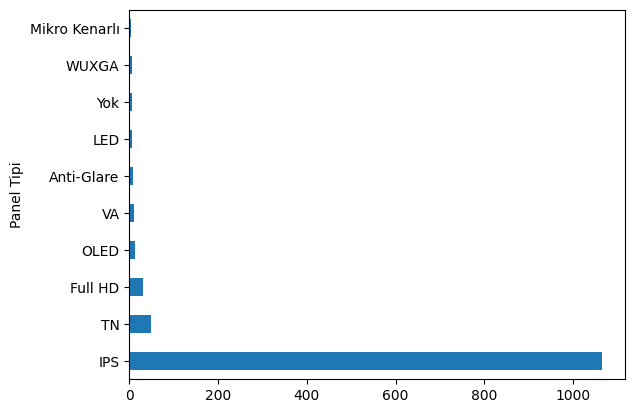

In [951]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['Panel Tipi'].value_counts().plot.barh();

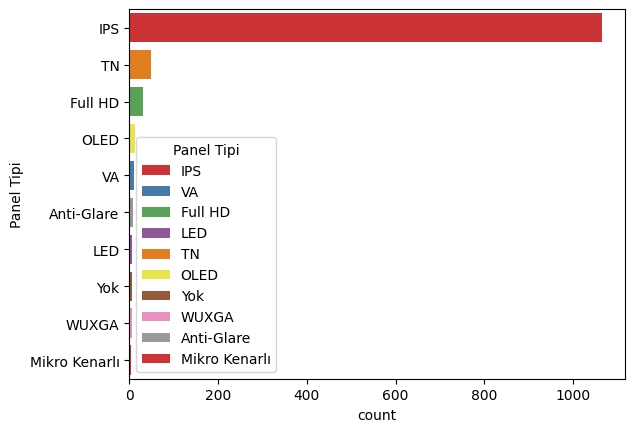

In [952]:
sns.countplot(data = df,
              y = "Panel Tipi",
              hue = "Panel Tipi",
              order = df["Panel Tipi"].value_counts().index,
              palette = "Set1");

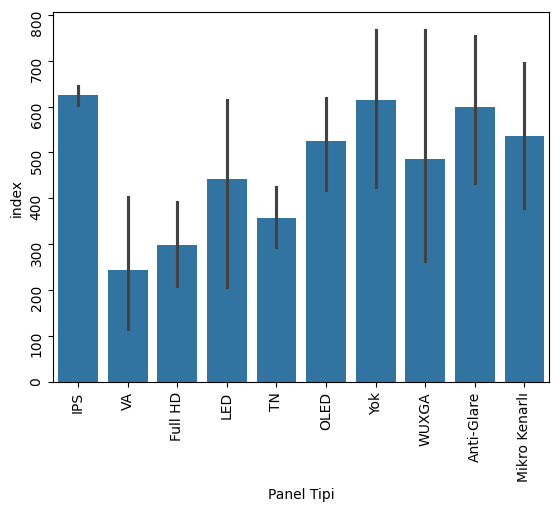

In [955]:
# Barplot için doğru kullanım
#sns.barplot(data=df, x="Panel Tipi", y="Panel Tipi")
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index ve barplot çizimi
sns.barplot(data=df.reset_index(), x="Panel Tipi", y="index")

# x ve y etiketlerini döndürmek için:
plt.xticks(rotation=90)  # x ekseni etiketlerini 90 derece döndür
plt.yticks(rotation=90)  # y ekseni etiketlerini 90 derece döndür (gerekiyorsa)

# Grafiği gösterme
plt.show()


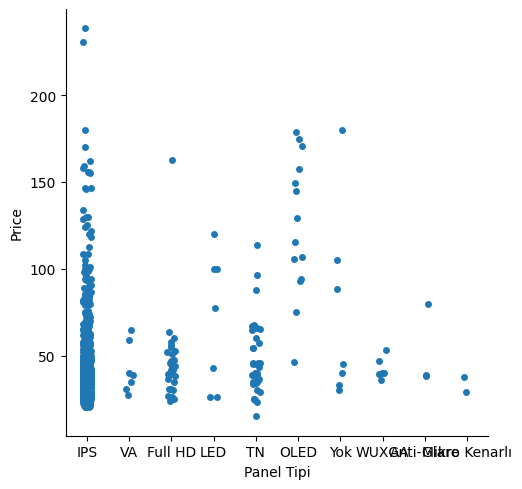

In [956]:
sns.catplot(data = df,
            x = "Panel Tipi",
            y = "Price");

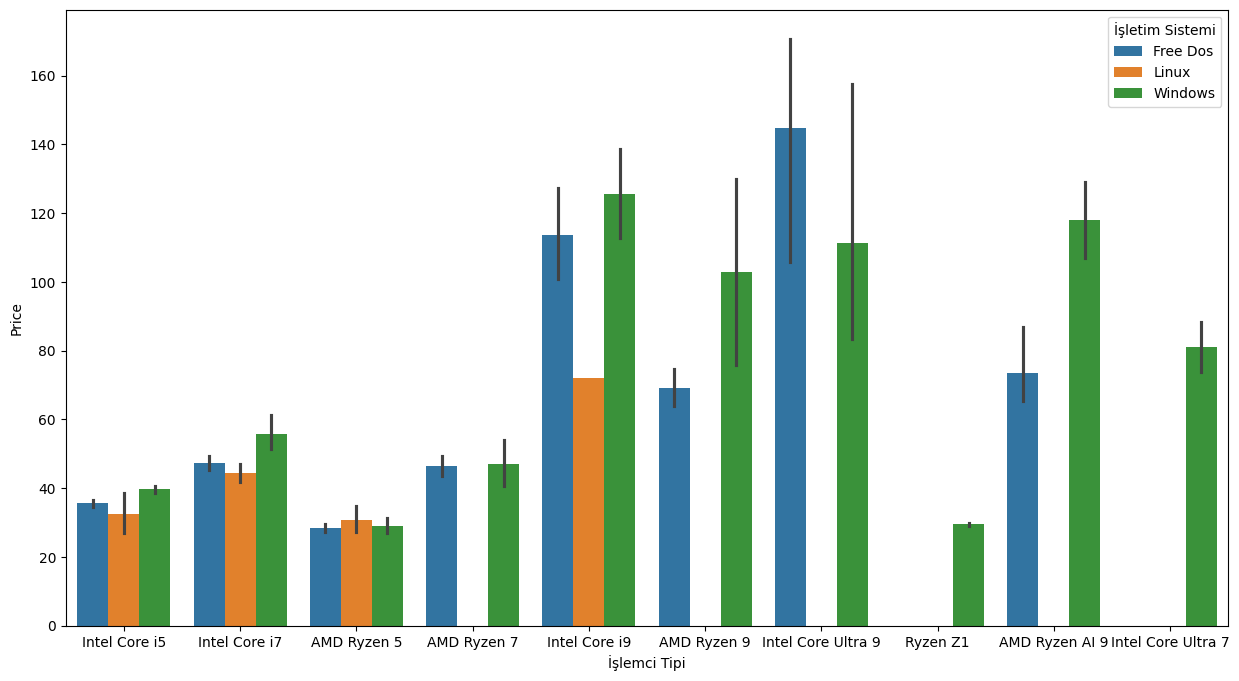

In [957]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "İşlemci Tipi",
            y = "Price",
            hue = "İşletim Sistemi");